In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Loading the data

In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
target_column = 'Price'

In [5]:
X = data.drop([target_column], axis=1)
y = data[target_column]

# transform categorical variables to numerical variables
le = LabelEncoder()
X['Suburb'] = le.fit_transform(X['Suburb'])
X['Address'] = le.fit_transform(X['Address'])
X['Regionname'] = le.fit_transform([str(rn) for rn in X['Regionname']])
X['CouncilArea'] = le.fit_transform([str(ca) for ca in X['CouncilArea']])
X['SellerG'] = le.fit_transform(X['SellerG'])
X['Type'] = le.fit_transform(X['Type'])
X['Method'] = le.fit_transform(X['Method'])
X['Day'] = [int(d.split('/')[0]) for d in X['Date']]
X['Month'] = [int(d.split('/')[1]) for d in X['Date']]
X['Year'] = [int(d.split('/')[2]) for d in X['Date']]
X.drop(['Date'], axis=1, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)

In [7]:
pd.set_option('display.max_columns', None)

Manual Datapreprocessing

In [8]:
# drop the 14 houses with more than 8 rooms
data_train = data_train.drop(data_train[data_train['Rooms'] > 8].index, axis=0)
data_test = data_test.drop(data_test[data_test['Rooms'] > 8].index, axis=0)

In [9]:
# remove rows where the price is missing
data_train = data_train.drop(data_train[data_train['Price'].isnull()].index, axis=0)
data_test = data_test.drop(data_test[data_test['Price'].isnull()].index, axis=0)

In [10]:
# drop the houses with a price higher or equal to 4 million
data_train = data_train.drop(data_train[data_train['Price'] >= 4000000].index, axis=0)
data_test = data_test.drop(data_test[data_test['Price'] >= 4000000].index, axis=0)

In [11]:
# drop the one row where the distance is missing
data_train = data_train.drop(data_train[data_train['Distance'].isnull()].index, axis=0)
data_test = data_test.drop(data_test[data_test['Distance'].isnull()].index, axis=0)

In [12]:
# drop the 96 houses with a distance greater than 38
data_train = data_train.drop(data_train[data_train['Distance'] > 38].index, axis=0)
data_test = data_test.drop(data_test[data_test['Distance'] > 38].index, axis=0)

In [13]:
# drop the 34 houses with more than 6 bedrooms
data_train = data_train.drop(data_train[data_train['Bedroom2'] > 6].index, axis=0)
data_test = data_test.drop(data_test[data_test['Bedroom2'] > 6].index, axis=0)

In [14]:
# remove rows where Bedroom2 is missing
data_train = data_train.drop(data_train[data_train['Bedroom2'].isnull()].index, axis=0)
data_test = data_test.drop(data_test[data_test['Bedroom2'].isnull()].index, axis=0)

In [15]:
# remove the 6 rows where Bathroom is missing
data_train = data_train.drop(data_train[data_train['Bathroom'].isnull()].index, axis=0)
data_test = data_test.drop(data_test[data_test['Bathroom'].isnull()].index, axis=0)

In [16]:
# drop the 49 houses with more than 4 bathrooms
data_train = data_train.drop(data_train[data_train['Bathroom'] > 4].index, axis=0)
data_test = data_test.drop(data_test[data_test['Bathroom'] > 4].index, axis=0)

In [17]:
# drop the 25 houses with more than 25 car spots
data_train = data_train.drop(data_train[data_train['Car'] > 7].index, axis=0)
data_test = data_test.drop(data_test[data_test['Car'] > 7].index, axis=0)

In [18]:
# replace missing values for car with median
data_train['Car'].fillna(data_train['Car'].median(), inplace=True)
data_test['Car'].fillna(data_train['Car'].median(), inplace=True)

In [19]:
# drop the 69 houses with a landsize greater than 5000
data_train = data_train.drop(data_train[data_train['Landsize'] > 5000].index, axis=0)
data_test = data_test.drop(data_test[data_test['Landsize'] > 5000].index, axis=0)

In [20]:
# replace zero values in landsize with the mean
data_train['Landsize'] = data_train.apply(lambda row: data_train['Landsize'].mean() if row['Landsize'] == 0 else
                                          row['Landsize'], axis=1)
data_test['Landsize'] = data_test.apply(lambda row: data_train['Landsize'].mean() if row['Landsize'] == 0 else
                                          row['Landsize'], axis=1)

In [21]:
# replace missing values for landsize with the mean
data_train['Landsize'].fillna(data_train['Landsize'].mean(), inplace=True)
data_test['Landsize'].fillna(data_train['Landsize'].mean(), inplace=True)

In [22]:
# drop the 85 houses with a BuildingArea greater than 500
data_train = data_train.drop(data_train[data_train['BuildingArea'] > 500].index, axis=0)
data_test = data_test.drop(data_test[data_test['BuildingArea'] > 500].index, axis=0)

In [23]:
# replace zero values in BuildingArea with the mean
data_train['BuildingArea'] = data_train.apply(lambda row: data_train['BuildingArea'].mean() 
                                              if row['BuildingArea'] == 0 else row['BuildingArea'], axis=1)
data_test['BuildingArea'] = data_test.apply(lambda row: data_train['BuildingArea'].mean() 
                                              if row['BuildingArea'] == 0 else row['BuildingArea'], axis=1)

In [24]:
# replace missing values for BuildingArea with the mean
data_train['BuildingArea'].fillna(data_train['BuildingArea'].mean(), inplace=True)
data_test['BuildingArea'].fillna(data_train['BuildingArea'].mean(), inplace=True)

In [25]:
# drop the 3 houses that were built before 1850
data_train = data_train.drop(data_train[data_train['YearBuilt'] < 1850].index, axis=0)
data_test = data_test.drop(data_test[data_test['YearBuilt'] < 1850].index, axis=0)

In [26]:
# replace missing values for YearBuilt with the mean
data_train['YearBuilt'].fillna(data_train['YearBuilt'].mean(), inplace=True)
data_test['YearBuilt'].fillna(data_train['YearBuilt'].mean(), inplace=True)

In [27]:
# replace missing values for Lattitude with the mean
data_train['Lattitude'].fillna(data_train['Lattitude'].mean(), inplace=True)
data_test['Lattitude'].fillna(data_train['Lattitude'].mean(), inplace=True)

In [28]:
# replace missing values for Longtitude with the mean
data_train['Longtitude'].fillna(data_train['Longtitude'].mean(), inplace=True)
data_test['Longtitude'].fillna(data_train['Longtitude'].mean(), inplace=True)

In [29]:
# handling of outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_train_pred = lof.fit_predict(data_train)
data_train = data_train.drop(data_train[outlier_train_pred == -1].index, axis=0)
outlier_test_pred = lof.fit_predict(data_test)
data_test = data_test.drop(data_test[outlier_test_pred == -1].index, axis=0)

In [31]:
# standardization
standardizer = preprocessing.StandardScaler()
X_train = data_train.drop([target_column], axis=1)
X_test = data_test.drop([target_column], axis=1)
standardizer.fit(X_train)
X_train = pd.DataFrame(data=standardizer.transform(X_train), columns=X_train.columns, index=X_train.index)
data_train = pd.concat([X_train, data_train[target_column]], axis=1)
X_test = pd.DataFrame(data=standardizer.transform(X_test), columns=X_test.columns, index=X_test.index)
data_test = pd.concat([X_test, data_test[target_column]], axis=1)

In [33]:
# backward elimination
X_train = data_train.drop([target_column], axis=1)
y_train = data_train[target_column]
numVars = X_train.shape[1]
for i in range(0, numVars):
    regressor_OLS = sm.OLS(endog = y_train, exog = X_train).fit()
    maxVar = max(regressor_OLS.pvalues)
    if maxVar > 0.05:
        for j in range(0, numVars - i):
            if (regressor_OLS.pvalues[j] == maxVar):
                X_train.drop([X_train.columns[j]], axis=1, inplace=True)
data_train = pd.concat([X_train, y_train], axis=1)
data_test = data_test[data_train.columns]

Building of the models

In [34]:
def getXy(dataset):
    X_data = dataset.drop([target_column], axis=1)
    y_data = dataset[target_column]
    return X_data, y_data

In [35]:
X_train, y_train = getXy(data_train)

In [36]:
X_test, y_test = getXy(data_test)

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)
R2 = metrics.r2_score(y_test, lin_reg_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.624418773966


In [38]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
decision_tree_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, decision_tree_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.672740321697


In [39]:
regressor = RandomForestRegressor(n_estimators=2, random_state=0)
regressor.fit(X_train, y_train)
random_forest_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, random_forest_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.716596566651


In [40]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
random_forest_100_pred = regressor.predict(X_test)
R2 = metrics.r2_score(y_test, random_forest_100_pred)
n = len(y_test)
p = X_test.shape[1] - 1
print('Adj-R2:', 1-(1-R2)*(n-1)/(n-p-1))

Adj-R2: 0.827034069458


Plots for the predictions

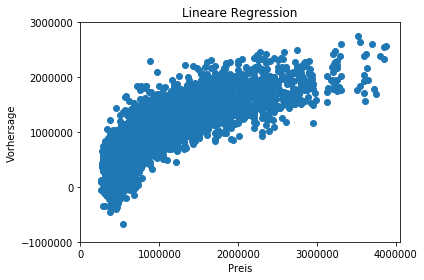

In [41]:
plt.scatter(y_test, lin_reg_pred)
plt.title('Lineare Regression')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([-1000000, 0, 1000000, 2000000, 3000000])
plt.tight_layout()

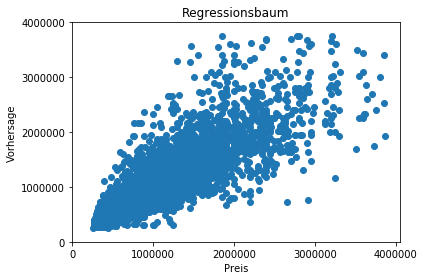

In [42]:
plt.scatter(y_test, decision_tree_pred)
plt.title('Regressionsbaum')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

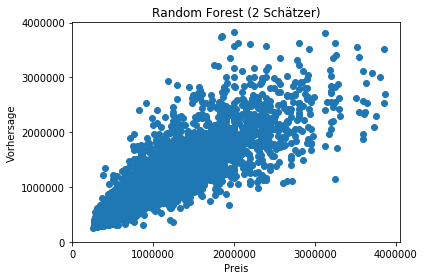

In [43]:
plt.scatter(y_test, random_forest_pred)
plt.title('Random Forest (2 Schätzer)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

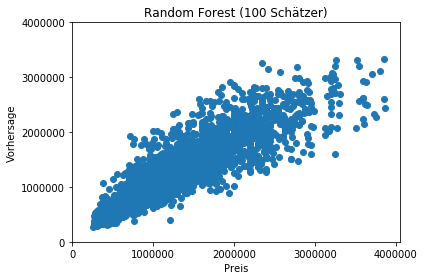

In [44]:
plt.scatter(y_test, random_forest_100_pred)
plt.title('Random Forest (100 Schätzer)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

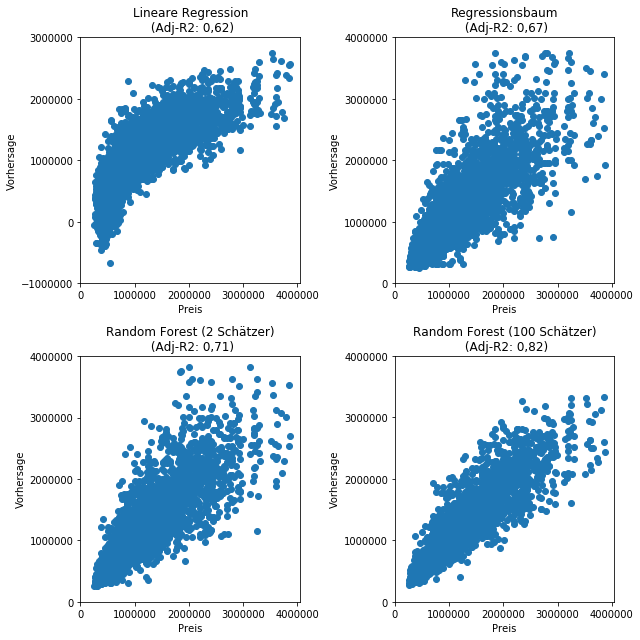

In [45]:
fig = plt.figure()
fig.set_figheight(9)
fig.set_figwidth(9)

plt.subplot(2, 2, 1)
plt.scatter(y_test, lin_reg_pred)
plt.title('Lineare Regression\n (Adj-R2: 0,62)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([-1000000, 0, 1000000, 2000000, 3000000])
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.scatter(y_test, decision_tree_pred)
plt.title('Regressionsbaum\n (Adj-R2: 0,67)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.scatter(y_test, random_forest_pred)
plt.title('Random Forest (2 Schätzer)\n (Adj-R2: 0,71)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.scatter(y_test, random_forest_100_pred)
plt.title('Random Forest (100 Schätzer)\n (Adj-R2: 0,82)')
plt.xlabel('Preis')
plt.ylabel('Vorhersage')
plt.xticks([0, 1000000, 2000000, 3000000, 4000000])
plt.yticks([0, 1000000, 2000000, 3000000, 4000000])
plt.tight_layout()

plt.show()